In [1]:
import sys

if ".." not in sys.path:
    sys.path.append("..")

import os
import PIL.Image as Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle

from collections import defaultdict
from pprint import pprint
from time import process_time

from common.task import path_join, load_ground_truths, get_best_bag_of_features_histograms
from common.evaluation import SegmentfreeWordSpottingEvaluator

%load_ext autoreload
%autoreload 2
%matplotlib widget
%matplotlib inline

In [35]:
img_path = '2700270'
n_centroids = 200
step_size = 20
# load ground truth for image 2700270.png
visual_words = load_ground_truths('2700270.gtp') 
visual_word = visual_words[3]
print(f"{visual_word=}")

visual_word=(116, 171, 255, 237, '270')


In [44]:
rv = get_best_bag_of_features_histograms('2700270.png', visual_word[:4], n_centroids, step_size)

Starting with len(all_bofs)=5000
Ending with len(result_bofs)=1627


# Visualization

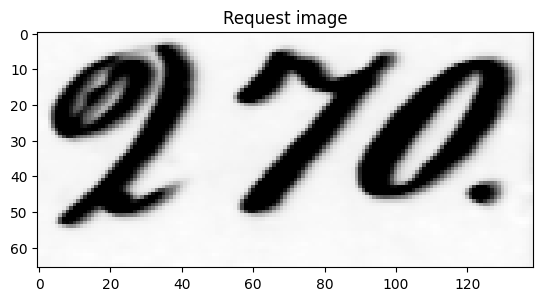

In [37]:
x1, y1, x2, y2, _ = visual_word
document = Image.open(path_join('pages', '2700270.png'))
doc_arr = np.asarray(document, dtype='uint8')
req_arr = doc_arr[y1:y2, x1:x2]

plt.imshow(req_arr, cmap=cm.get_cmap("Greys_r"))
plt.title("Request image")
plt.show()

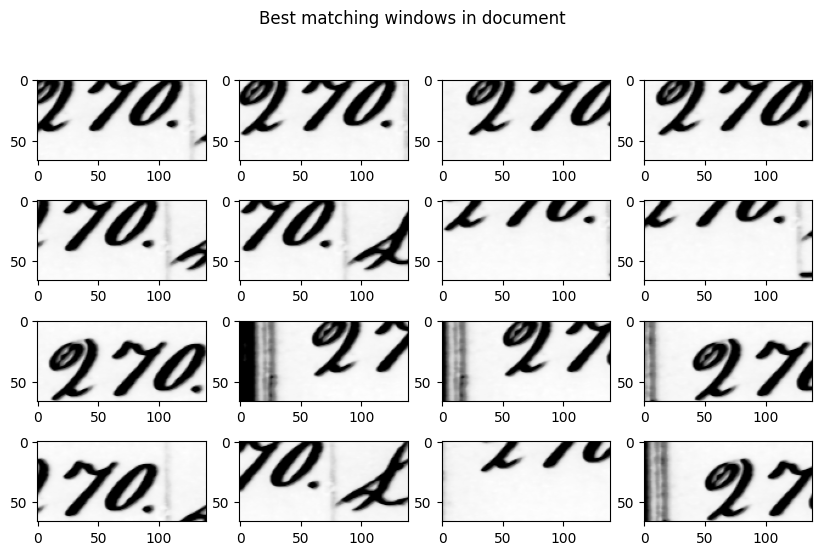

In [38]:
row_cols = 4
fig = plt.figure(figsize=(10, 6))
fig.suptitle("Best matching windows in document")

for idx, info in enumerate(rv):
    if idx == row_cols**2:
        break

    wx, wy, wxx, wyy = info['window']
    ax = fig.add_subplot(row_cols, row_cols, idx + 1)
    subimg = doc_arr[wy:wyy, wx:wxx]
    ax.imshow(subimg, cmap=cm.get_cmap('Greys_r'))

In [50]:
# TODO: remove
from common.task import intersection_over_union, __non_maximum_suppresion
tmp = rv[:13]
__non_maximum_suppresion(tmp)

[[130 180 269 246]
 [120 180 259 246]
 [100 180 239 246]
 [110 180 249 246]
 [150 180 289 246]
 [170 180 309 246]
 [120 200 259 266]
 [130 200 269 266]
 [180 180 319 246]
 [110 160 249 226]
 [150 160 289 226]
 [ 60 180 199 246]
 [ 70 180 209 246]]


[]

# Evaluation

In [ ]:
# 3 - and
# 4 - instructions
# 5 - october
# 83 - officers

img_path = '2700270.png'
n_centroids = 200
step_size = 30
word_index = 5
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

In [ ]:
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path='2700270.png',
    n_centroids=150,
    step_size=20
)

start_time = process_time()
avg_prec, avg_rec, avg_mean_prec, overall_precision, overall_recall, overall_mean_prec = sfwse.validate(max_eval_length)
end_time = process_time()

print(f"Needed time: {(end_time - start_time)} secs")
print('#' * 48)
print(f"{avg_prec=}")
print(f"{avg_rec=}")
print(f"{avg_mean_prec=}")
print('#' * 48)
pprint(f"{overall_precision=}")
pprint(f"{overall_recall=}")
pprint(f"{overall_mean_prec=}")

In [7]:
# TODO: remove, just for presentation
img_path = '2700270.png'
n_centroids = 100
step_size = 10
word_index = 3
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (800, 166, 1007, 246, 'and')
prec=0.8 rec=1.1428571428571428 mean_prec=1.1142857142857143


In [8]:
# TODO: remove, just for presentation
img_path = '2700270.png'
n_centroids = 150
step_size = 10
word_index = 3
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (800, 166, 1007, 246, 'and')
prec=0.8 rec=1.1428571428571428 mean_prec=1.126984126984127


In [4]:
# TODO: remove, just for presentation
img_path = '2700270.png'
n_centroids = 100
step_size = 20
word_index = 4
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (1019, 139, 1570, 237, 'instructions')
prec=1.0 rec=5.0 mean_prec=5.0


In [6]:
# TODO: remove, just for presentation
img_path = '2700270.png'
n_centroids = 150
step_size = 20
word_index = 4
max_eval_length = 10

sfwse = SegmentfreeWordSpottingEvaluator(
    img_path,
    n_centroids,
    step_size
)

result = sfwse.crossvalidate(word_index, max_eval_length)
prec, rec, mean_prec = result
print(f"{prec=} {rec=} {mean_prec=}")

Evaluating word (1019, 139, 1570, 237, 'instructions')
prec=1.0 rec=5.0 mean_prec=5.0
